In [29]:
import pandas as pd
bike = pd.read_csv("bike.csv")
del bike['casual']
del bike ['registered']
bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129


In [40]:
#자전거 수요량 예측 
from sklearn.ensemble import RandomForestRegressor

data = bike.iloc[:,:-1].to_numpy()
target = bike ['count'].to_numpy()
rf = RandomForestRegressor(oob_score=True)
rf.fit(data,target)
rf.oob_score_

0.9999964797058202

In [33]:
bike = pd.read_csv("bike.csv")
del bike['casual']
del bike ['registered']
bike.info() #누락값 확인 - > 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


In [34]:
bike['datetime'] = pd.to_datetime(bike['datetime'])
bike['year'] = bike['datetime'].dt.year
bike['month'] = bike['datetime'].dt.month
bike['day'] = bike['datetime'].dt.day
bike['hour'] = bike['datetime'].dt.hour

del bike['datetime']
bike

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22


In [35]:
import calendar 

#calendar.weekday(2015,12,31)

box = []
for y,m,d in zip(bike['year'], bike['month'],bike['day']):
    a = calendar.weekday(y,m,d)
    box.append(a)
bike['weekday'] = box
bike

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22,2


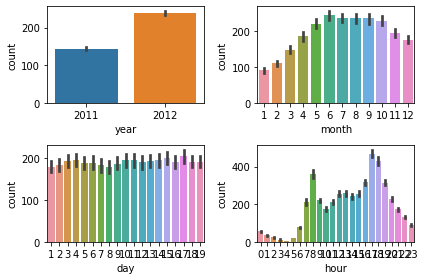

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.barplot(x='year',y='count',data=bike,ax=ax1)
sns.barplot(x='month',y='count',data=bike,ax=ax2)
sns.barplot(x='day',y='count',data=bike,ax=ax3)
sns.barplot(x='hour',y='count',data=bike,ax=ax4)

plt.tight_layout()

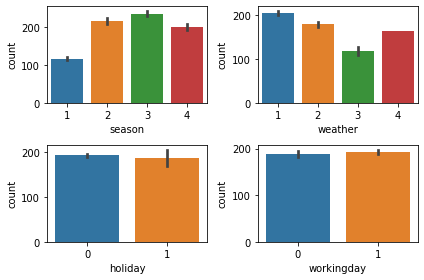

In [37]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.barplot(x='season',y='count',data=bike,ax=ax1)
sns.barplot(x='weather',y='count',data=bike,ax=ax2)
sns.barplot(x='holiday',y='count',data=bike,ax=ax3)
sns.barplot(x='workingday',y='count',data=bike,ax=ax4)

plt.tight_layout()

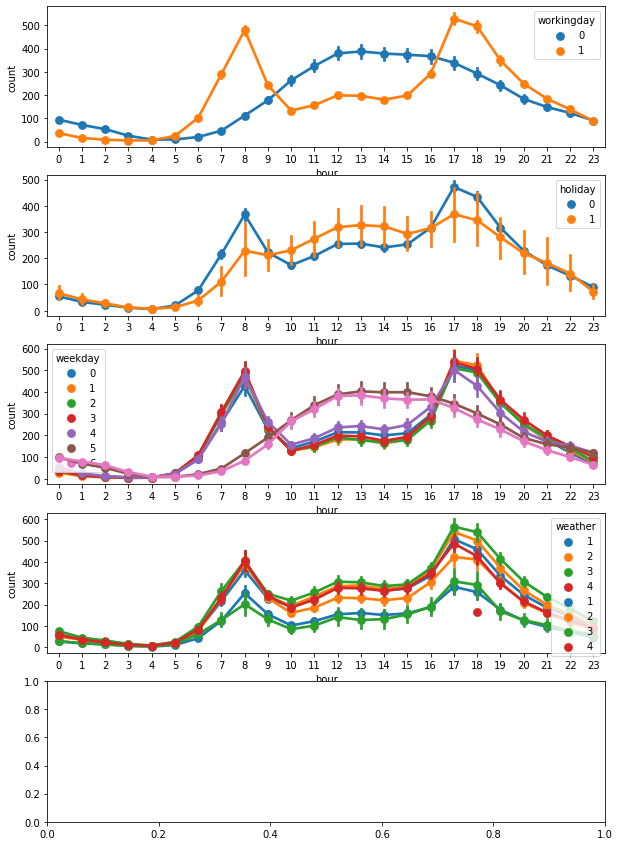

In [38]:
fig = plt.figure(figsize = (10,15))

ax1 = fig.add_subplot(5,1,1)
ax2 = fig.add_subplot(5,1,2)
ax3 = fig.add_subplot(5,1,3)
ax4 = fig.add_subplot(5,1,4)
ax5 = fig.add_subplot(5,1,5)

sns.pointplot(x='hour',y='count',data=bike, ax=ax1, hue ='workingday')
sns.pointplot(x='hour',y='count',data=bike, ax=ax2, hue ='holiday')
sns.pointplot(x='hour',y='count',data=bike, ax=ax3, hue ='weekday')
sns.pointplot(x='hour',y='count',data=bike, ax=ax4, hue ='season')
sns.pointplot(x='hour',y='count',data=bike, ax=ax4, hue ='weather')

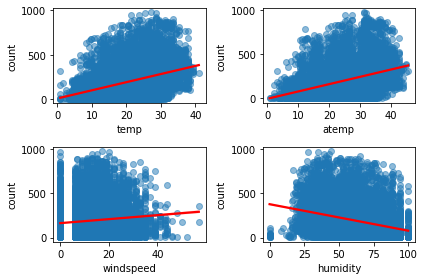

In [ ]:
#날씨 4인것 제거
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.regplot(x='temp', y='count', data=bike, scatter_kws = {'alpha': 0.5}, line_kws = {'color' : 'red'}, ax = ax1)
sns.regplot(x='atemp', y='count', data=bike, scatter_kws = {'alpha': 0.5}, line_kws = {'color' : 'red'}, ax = ax2)
sns.regplot(x='windspeed', y='count', data=bike, scatter_kws = {'alpha': 0.5}, line_kws = {'color' : 'red'}, ax = ax3)
sns.regplot(x='humidity', y='count', data=bike, scatter_kws = {'alpha': 0.5}, line_kws = {'color' : 'red'}, ax = ax4)
fig.tight_layout()

In [ ]:
#바람 삭제 (오염된 데이터)
del bike['windspeed']
bike

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,336,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,241,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,168,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,129,2012,12,19,22,2


In [23]:
bike2 = bike[bike['weather']!=4]
bike2

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22,2


In [39]:
data = bike2.loc[:,bike2.columns != 'count'].to_numpy() #count 아닌 것 다 가져오기
target = bike2['count'].to_numpy()

rf = RandomForestRegressor(oob_score=True)
rf.fit(data,target)
rf.oob_score_

0.953429748564229